## Load packages

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


## Create test data with binary classes

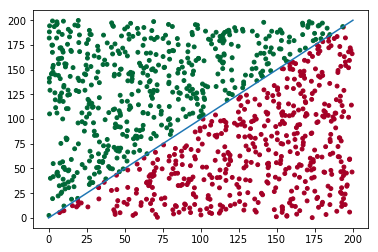

In [2]:
size = 1000
upper = 200
lower = 0
X1 = np.random.uniform(lower, upper, size)
X2 = np.random.uniform(lower, upper, size)
Y = np.zeros(size)
Y[X1 <= X2] = 1
plt.scatter(X1, X2, c=Y, s=15, cmap=plt.cm.RdYlGn)
plt.plot([lower, upper], [lower, upper])
plt.show()

## Simple Perceptron
Use Keras with only input and output layer with softmax function.

In [3]:
model = Sequential()
model.add(Dense(activation='softmax', input_dim=2, output_dim=2))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
predictors = np.column_stack((X1, X2))
target = to_categorical(Y)
model.fit(predictors, target)

C:\Users\Chia Wei\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", input_dim=2, units=2)`
  


Epoch 1/10
1000/1000 [==============================] - 0s - loss: 2.1789 - acc: 0.8210     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.2853 - acc: 0.9660     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 0.9096 - acc: 0.9120     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 0.2086 - acc: 0.9730     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 0.4094 - acc: 0.9610     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 0.2811 - acc: 0.9620     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 0.1379 - acc: 0.9810     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 0.1935 - acc: 0.9820     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 0.2396 - acc: 0.9720         
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 0.1476 - acc: 0.9840     


## Validation using model weights
Use forward propagation to examine the outcome

In [4]:
def softmax(v):
    A = np.exp(v)
    A = A / A.sum(axis=1, keepdims=True)
    return A

W = model.get_weights()[0]
b = model.get_weights()[1]
X = predictors
fp_result = np.argmax(softmax(X.dot(W) + b), axis=1) # Take the largest probablity
prediction = np.argmax(model.predict(X), axis = 1)

print('Accuracy rate of manual calculation: ', np.mean(fp_result == Y))
print('Accuracy rate of model prediction: ', np.mean(prediction == Y))

Accuracy rate of manual calculation:  0.998
Accuracy rate of model prediction:  0.998


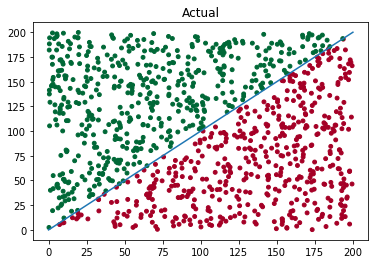

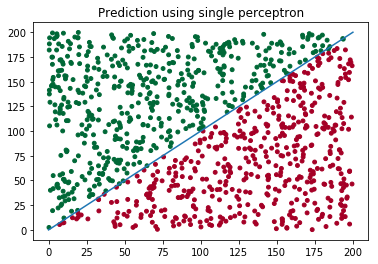

In [5]:
plt.scatter(X1, X2, c=Y, s=15, cmap=plt.cm.RdYlGn)
plt.plot([lower, upper], [lower, upper])
plt.title('Actual')
plt.show()

plt.scatter(X1, X2, c=prediction, s=15, cmap=plt.cm.RdYlGn)
plt.plot([lower, upper], [lower, upper])
plt.title('Prediction using single perceptron')
plt.show()

## Simple Perceptron without bias

In [6]:
model = Sequential()
model.add(Dense(activation='softmax', input_dim=2, output_dim=2, use_bias=False))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
predictors = np.column_stack((X1, X2))
target = to_categorical(Y)
model.fit(predictors, target)

C:\Users\Chia Wei\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", input_dim=2, use_bias=False, units=2)`
  


Epoch 1/10
1000/1000 [==============================] - 0s - loss: 1.4171 - acc: 0.8820     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.4422 - acc: 0.9530     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 0.4562 - acc: 0.9560         
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 0.4819 - acc: 0.9560     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 0.2992 - acc: 0.9720     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 0.0821 - acc: 0.9920     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 0.6963 - acc: 0.9420     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 0.7082 - acc: 0.9480     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 0.4290 - acc: 0.9610         
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 0.0616 - acc: 0.9910     


In [7]:
def softmax(v):
    A = np.exp(v)
    A = A / A.sum(axis=1, keepdims=True)
    return A

W = model.get_weights()[0]
X = predictors
fp_result = np.argmax(softmax(X.dot(W)), axis=1) # Take the largest probablity
prediction = np.argmax(model.predict(X), axis = 1)

print('Accuracy rate of manual calculation: ', np.mean(fp_result == Y))
print('Accuracy rate of model prediction: ', np.mean(prediction == Y))

Accuracy rate of manual calculation:  0.988
Accuracy rate of model prediction:  0.988


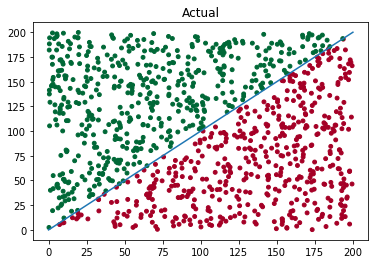

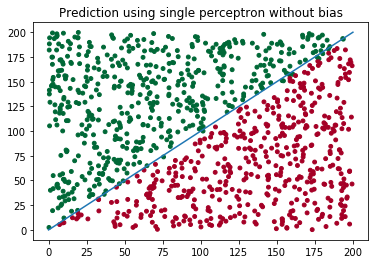

In [8]:
plt.scatter(X1, X2, c=Y, s=15, cmap=plt.cm.RdYlGn)
plt.plot([lower, upper], [lower, upper])
plt.title('Actual')
plt.show()

plt.scatter(X1, X2, c=prediction, s=15, cmap=plt.cm.RdYlGn)
plt.plot([lower, upper], [lower, upper])
plt.title('Prediction using single perceptron without bias')
plt.show()